

## **Análise descritiva dos dados de venda de avocado nos EUA utilizando o framework Cross-Industry Standard Process for Data Mining (CRISP-DM)**


### Equipe: Augusto Cardoso Agostini (202001856); Pedro Caracas de Souza Albuquerque (202001522)

### Disciplina: IACEC – MECD – Prof. João Moreira



<br>

### 1 - INTRODUÇÃO

#### **CRISP-DM**

O processo  entitulado Cross-industry standard process for data mining (CRISP-DM) é um framework ou padrão de procedimentos para replicar os passos de abordagens comumente usadas na mineração de dados. O processo de implementação do CRISP-DM pode ser dividido em 6 etapas - sendo que no presente trabalho serão desenolvidas apenas as etapas de 1 a 5:

#### **Etapa 1:** Business understanding
Definição do probema principal e requerimentos de pessoas, ferramentas e objetos de estudo, planejar os passos a serem seguidos ao longo do processo CRISP-DM.

#### **Etapa 2:** Data Understanding
Aquisição, exploração, descrição e verificação da qualidade dos dados (Ex: o que os dados faltantes significam no contexto dos dados adiquiridos);

#### **Etapa 3:** Data preparation
Selecionar, limpar( tratar os valores faltantes, outliers, valores sem sentido); construir novos dados para melhorar o entendimento sobre os dados coletados.

#### **Etapa 4:** Modeling
Selecionar o modelo de a ser utilizado nos dados; separar os dados em trechos de treino e teste; adaptar os dados para o formato especificado pelo modelo; avaliar os resultados do modelo.

#### **Etapa 5:** Evaluation
Avaliar os resultados do modelo treinado de forma mais profunda, verificar o impacto causado no entendimento do objetivo, revisar os objetivos do processo.

#### **Etapa 6:** Deployment
Planejar, implantar, monitorar e manter o modelo em produção; desenvolver um relatório sobre a utilização do CRISP-DM no projeto em específico; Revisar o projeto e identificar novos objetivos a serem explorados em futuros projetos.

<br>

### 2 - BUSINESS UNDERSTANDING

#### **2.1 Objetivo em termos de negócio**

O objetivo deste trabalho de um ponto de vista amplo de negócio é analisar o mercado de venda de avocado nos EUA, considerando o preço médio de venda de avocados, diversas regiões dos EUA, volume de venda de três tamanhos*, dois tipos (orgânico e convencional), três tamanhos de bolsas de abacates (pequena, grande e muito grande) e data de venda (mês e ano). Ainda, pretende-se verificar possíveis segregações do mercado, sejam elas de regiões de consumo ou de agrupamentos entre preço/volume e tipo de avocado ou entre preço e volume propriamente dito.

Em suma, o problema a ser resolvido é identificar padrões e comportamentos do varejo de avocado nos EUA, de forma que uma empresa que já atua na área possa iniciar seu planejamento para uma amplianção de capacidade (em volume e geográfica). Ainda, a resolução deste problema antecede a resolução de problemas específicos e apoio à decisão como, por exemplo, decidir os melhores preços de venda de cada tipo de avocado, em cada região, em cada época do ano.

*tamanhos:

- Hass Avocado pequeno/médio (3-5oz por avocado): #4046

- Hass Avocado grande (8-10oz por avocado): #4225

- Hass Avocado muito grande (10-15oz por avocado): #4770


#### **2.2 Cenário atual do negócio (em termos de utilização de Data Mining):**

Atualmente a empresa interessada em desenvolver o projeto de aálise do mercado de avocado dos EUA não utiliza de qualquer técnica de Data Mining para tomar decisões nem entender seu desemprenho de vendas.


#### **2.3 Objetivo em termos de Data Mining:**

Do ponto de vista de Data Minig, o objetivo do presente trabalho se concretiza em realizar análises descritivas dos dados de venda de avocado, sendo assim possível caracterizar o mercado de venda de avocado nos EUA. Além disso, busca-se segragações e agrupamentos de instâncias semelhantes. 


#### **2.4 Abordagem de Data Mining:**

Os objetivos de Data Mining serão atingidos utilizando de uma abordagem que busca identificar possíveis padrões nos dados, através de gráficos de distintos tipos e de diferentes variáveis, bem como através cálculos de medidas de localização estatística. Ainda, será desenvolvido um modelo (bem como sua avaliação) de um algoritmo de clustering. Para tanto, é necessário tratar os dados (dados faltantes, com ruído, outliers, normalização etc). A implementação de tais técnicas será utilizando uma variedade de bibliotecas de Python.


#### **2.5  Critério de sucesso:**

Será considerado um trabalho de sucesso no caso de ser possível tirar conclusões factíveis acerca da relação entre as variáveis que compõe o mercado de avocado, bem como perceber padrões de consumo e de semelhança entre grupos de instâncias.


#### **2.6 O que se tem (software, dados etc):**

Tem-se à disposição algumas IDEs, onde se pretendo utilizar a linguagem de programação Python, e um Dataset no formato .csv obtido no site Kaggle (disponível em: https://www.kaggle.com/neuromusic/avocado-prices). Este arquivo conta com dados gerados pelo Hass Avocado Board (conforme apresentado em: http://www.hassavocadoboard.com/retail/volume-and-price-data). O arquivo conta com 13 atributos e cerca de 18 mil instâncias.

Os atributos são:

- Date - data de observação

- Average Price - preço médio de um único avocado qualquer

- Type - convencitonal ou orgânico

- Year - o ano da observação

- Region - a cidade ou região da observação

- Total Volume - número total de avocados vendidos

- 4046 - número total de avocado com PLU 4046 vendidos

- 4225 - número total de avocado com PLU 4225 vendidos

- 4770 - número total de avocado com PLU 4770 vendidos

- Total Bags - número total de bolsas vendidas

- Small Bags - número de bolsas pequenas vendidas

- Large Bags - número de bolsas grandes vendidas

- XLarge Bags - número de bolsas muito grandes vendidas


#### **2.7 Estimativa de esforço:**

Estima-se que para a análise demandará sete dias de trabalho, envolvendo dois analistas de dados.
















<br>

### 3 - DATA UNDERSTANDING

A fim de se iniciar o processo de entendimento dos dados devemos realizar primeiro as importações das bibliotecas, do arquivo .csv instanciando-o como um dataframe, e consultando algumas de suas informações, tais como dados faltantes, medidas estatísticas de cada atributos, tipo de dado de cada atributo, entre outras que serão visitadas na sequência.

<br>

#### - Importação das bibliotecas:

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
from numpy import median
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

<br>

#### - Leitura do arquivo de dados .csv (Dataset) como um Dataframe Pandas:

In [4]:
# Para ler o arquivo .csv do computador (Dataset retirado de: < https://www.kaggle.com/neuromusic/avocado-prices >. Acesso em: 19/10/2020)
#import io
#df = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))
df = pd.read_csv('avocado.csv')

<br>

#### - Visualização de 4 instâncias aleatórias do Dataframe:

In [5]:
df.sample(4)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18102,9,2018-01-21,1.95,18676.37,1088.49,9282.37,0.00,8305.51,8305.51,0.00,0.00,organic,2018,SanDiego
5568,4,2016-11-27,0.80,674184.53,415839.52,45217.58,9805.34,203322.09,104487.22,98716.81,118.06,conventional,2016,WestTexNewMexico
279,19,2015-08-16,1.50,69798.09,1230.78,45937.58,258.00,22371.73,22371.73,0.00,0.00,conventional,2015,BuffaloRochester
228,20,2015-08-09,1.07,690517.19,4173.23,590998.11,827.06,94518.79,94287.69,231.10,0.00,conventional,2015,Boston


<br>

#### - Criando uma cópia do Dataframe para servir de backup:

In [6]:
df_copy = df

<br>

#### - Visualização das medidas estatíticas de localização de cada atributo (ordinais e numéricos):

In [7]:
df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


<br>

#### - Deletar a coluna 'Unnamed:0', a qual em nada agrega, além de não se ter informação do que ela se trata:

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

<br>

#### - Verificação de atributos com valores faltantes:

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Não há valores faltantes de qualquer atributo em qualquer instância.

<br>

#### - Confirmando o número de instâncias do Dataframe/Dataset e o tipo de dado de cada atributo:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


<br>

#### - Na importação, o atributo Date veio em formato objeto. Portanto, a fim de facilitar sua manipulação, ele será transformado em formato Datetime:

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

<br>

Uma vez que temos um atributo que é o número total de avocados vendidos, as informações de número total de bolsas vendidas, bem como número de bolsas de cada tamanho vendidas (pequenas, grandes e muito grades), são redundantes para análises de vendas (onde nos intereça informações únicas de preço e de volume) e, portando, podemos desconsiderar estes atributos.

#### - Apagando atributos do dataframe:

In [12]:
df.drop(['Total Bags','Small Bags','Large Bags', 'XLarge Bags'], axis=1, inplace=True)


<br>

#### - Visualizando a variação do preço no tempo para qualquer avocado, juntamente com a variação do preço médio no tempo:

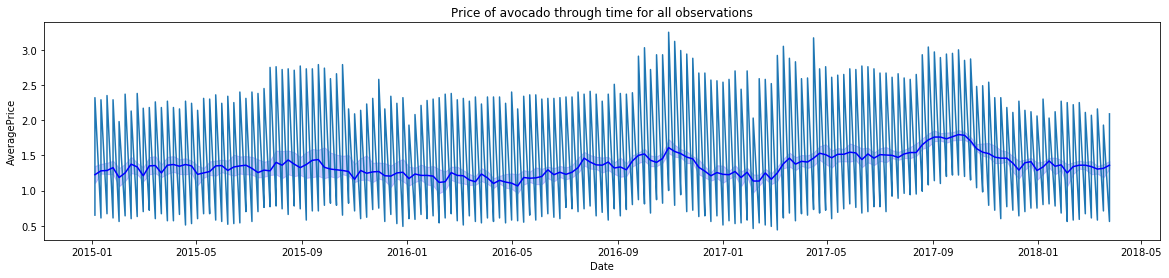

In [13]:
plt.figure(figsize = (20,4))
sns.lineplot(data=df, x='Date', y='AveragePrice', estimator=None)
sns.lineplot(data=df, x='Date', y='AveragePrice', estimator=np.median, color='Blue')
plt.title('Price of avocado through time for all observations')
plt.show()

Observa-se a possibilidade de existência de um leve padrão no preço médio de venda dado que para os três anos completos que se tem registro, o preço tende a estar mais alto entre o fim de julho ou início de agosto e a metade ou fim de outubro, mais ou menos, o que coincide boa parte com o outono e início do inverno no hemisfério norte da Terra, o que faz sentido, porque para este tipo fruta espera-se que haja maior produção quando a temperatura ambiente está alta e, logo, quando está frio a diminuição da produção acarreta em aumento dos preços. Isto será confirmado plotanto gráficos de volume por tempo na sequência. 

<br>

#### - Visualizando a variação do preço no tempo para qualquer por tipo de avocado:

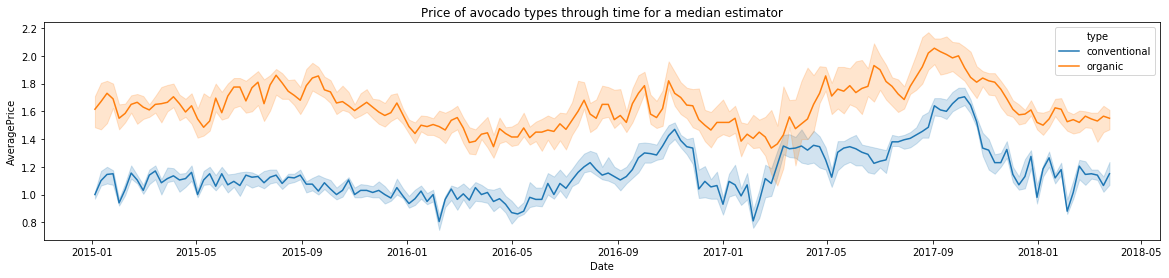

In [14]:
plt.figure(figsize = (20,4))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue = 'type', estimator=median)
plt.title('Price of avocado types through time for a median estimator')
plt.show()

Neste gráfico fica mais evidente o que já foi evidenciado no gráfico anterior: observa-se que o preço do abacate sofre alterações de sazonalidade. Ainda que no primeiro ano na média o preço se manteve constante, nos outros dois anos o preço seguiu o padrão de aumentar o preço no outono, como já colocado anteriormente.

<br>

#### - Vamos agora plotar o volume total de avocados vendidos por tipo de avocado ao longo dos um pouco mais de 3 anos:

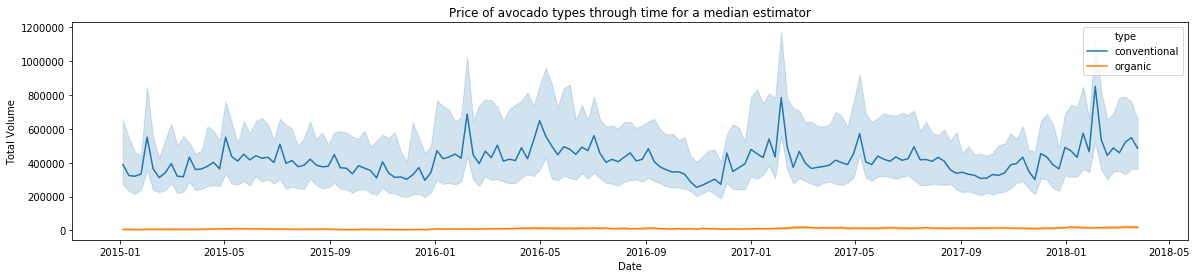

In [15]:
plt.figure(figsize = (20,4))
sns.lineplot(data=df, x='Date', y='Total Volume', hue = 'type', estimator=median)
plt.title('Price of avocado types through time for a median estimator')
plt.show()

Fora 2015, quando tanto os preços quanto o volume se mantiveram sem alterações por sazonalidade, nos outros anos observa-se que o comportamento é o inverso do preço: o volume aumenta e está em alta principalmente nos primeiros meses do ano, quando o preço está mais baixo, o volume passa a estar mais baixo quando o preço está em alta (mais ou menos no outono), e o preço volta a cair no fim do ano quando volume volta a crescer. Este comportamento está bastante coerente.

Porém, pelo fato do volume total de vendas dos avocados orgânicos serem muito inferiores ao volume total de vendas dos avocados convencionais e, ainda, pelo fato do gráfico acima estar relativamente esticado na direção horizontal (eixo do tempo), fica difícil de julgar a variação no consumo de avocados orgânicos com o passar dos anos.

<br>

#### - Cálculos da variação do consumo de avocados orgânicos a cada ano:

In [16]:
org2015=df[(df['type']=='organic') & (df['Date'].dt.year ==2015)]['Total Volume']
org2016=df[(df['type']=='organic') & (df['Date'].dt.year ==2016)]['Total Volume']
org2017=df[(df['type']=='organic') & (df['Date'].dt.year ==2017)]['Total Volume']
org2018=df[(df['type']=='organic') & (df['Date'].dt.year ==2018)]['Total Volume']
 
print('Aumento do volume de abacates organicos vendidos')
print('2016 em relação a 2015:', org2016.sum() / org2015.sum())
print('2017 em relação a 2016:', org2017.sum() / org2016.sum())
print('2017 em relação a 2015:', org2017.sum() / org2015.sum())
print('2018 em relação a 2017:', org2018.sum() / org2017.sum())

Aumento do volume de abacates organicos vendidos
2016 em relação a 2015: 1.4700227529937242
2017 em relação a 2016: 1.2870468802544914
2017 em relação a 2015: 1.891988198143692
2018 em relação a 2017: 0.28864219288352144


Observa-se um aumento de 47,00% de 2015 para 2016, de 28.70% de 2016 para 2017, de 89.20% de 2015 para 2017 e de 28.86% de 2017 para 2018. Este último teve um valor inferior em função da baixa quantidade de dados coletados referentes ao ano de 2018. Mas, no geral, oberva-se um acentuado aumento no consudo de avocados orgânicos conforme os anos passam.

Tais acontecimentos ficam ainda mais evidentes no gráfico abaixo.

<br>

#### - Grafico do volume total de avocados orgânicos vendidos ao longo do tempo:

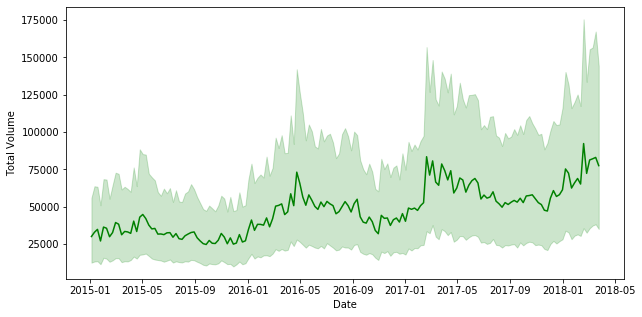

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df[df['type']=='organic'], x ='Date',y='Total Volume', color = 'Green')

<br>

#### - Extraindo do atributo "Date" os meses. Novos atributos para os números e nomes dos meses são criados:

In [18]:
df['Month'] = df['Date'].dt.month
df['Month-str'] = df['Date'].dt.strftime('%b')
df['Month-str-full'] = df['Date'].dt.strftime('%B')

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Month-str,Month-str-full
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,Dec,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,Dec,December
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,Dec,December
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,Dec,December
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,Nov,November


<br>

<br>

<br>

<br>



#### - Gráfico de barras do volume total vendido em cada mês do ano (tendo por estimador a meadiana):

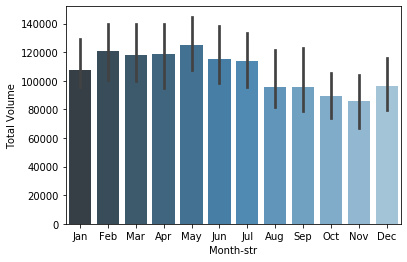

In [20]:
sns.barplot(x='Month-str', y='Total Volume', estimator=median, data=df, palette="Blues_d", 
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

No gráfico de barras acima fica mais evidente a tendência mensal de queda no volume total de avocados vendidos (agrupando para todos os anos e utilizando a mediana de cada mês como estimador) já mencionada anteriormente, na qual verifica-se uma queda acentuada no volume total de vendas durante o outono.

<br>

#### - Boxplot do preço médio de venda em cada ano:

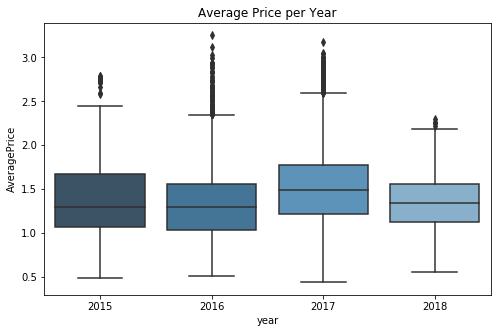

In [21]:
plt.figure(figsize = (8,5))
plt.title("Average Price per Year")
sns.boxplot(y="AveragePrice", x="year", data=df, palette="Blues_d");

Obsserva-se que o preço médio de um abacate qualquer tende a permanecer praticamente inalterado ao longo do ano, considerando a mediana anual, com exceção para o ano de 2017, quando obervou-se um aumento do preço médio de venda.

<br>

#### - Violin plot para preço médio de venda de cada tipo de avocado em cada ano:

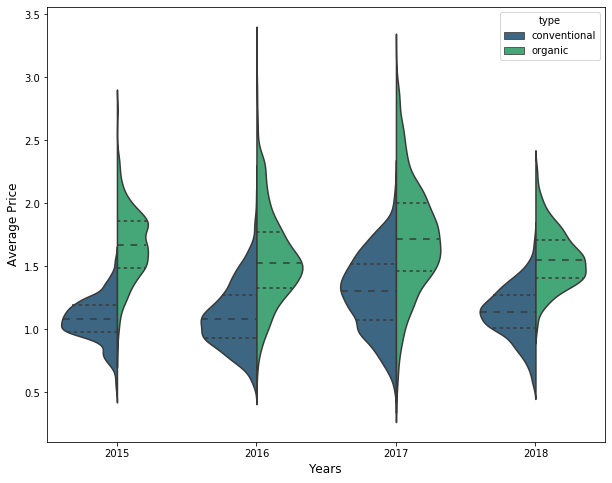

In [22]:
f,ax = plt.subplots(figsize = (10,8))
sns.violinplot(x="year", y="AveragePrice", hue="type", data=df,split=True, inner="quart",palette="viridis")
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Average Price',fontsize = 12);

Percebe-se que os diferentes tipos de avocado não possuem, necessariamente, uma relação quando se trata do preço médio. Isto é, pela mediana do preço médio de cada ano verifica-se que enquanto o preço médio de avocado convencial pode permanecer constante, o preço médio de abacate orgânica pode também se manter constante como pode cair, e vice-versa. Observa-se, ainda, que o aumento do preço médio de venda no ano de 2017 verificado no gráfico anterior se concretiza neste gráfico, onde verifica-se que os dois tipos de avocado seguiram o mesmo comportamento de alta no preço médio.

<br>

#### - Gráfico de barras do preço médio de venda em cada mês do ano (tendo por estimador a meadiana):

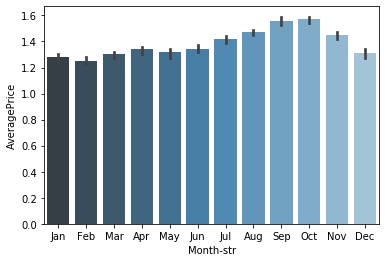

In [23]:
sns.barplot(x='Month-str', y='AveragePrice', estimator=median, data=df, 
            palette="Blues_d", order=['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

No gráfico de barras acima fica mais evidente a tendência mensal de alta no preço médio de avocados vendidos (agrupando para todos os anos e utilizando a mediana de cada mês como estimador) já mencionada anteriormente, na qual verifica-se uma alta no preço médio de venda durante o outono. A análise - tanto de preço médio quanto de volume total vendido - por estações do ano será feita mais adinte neste trabalho de forma e verificar esta afirmação de forma mais clara.

<br>

#### - Boxplot do preço médio de cada tipo de avocado:

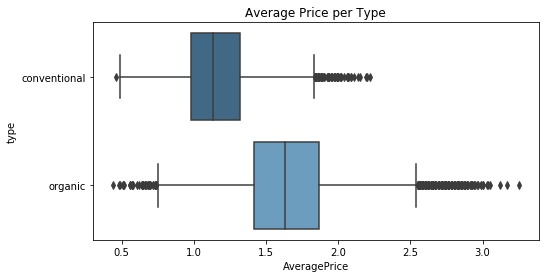

In [24]:
plt.figure(figsize = (8,4))
plt.title("Average Price per Type")
sns.boxplot(y="type", x="AveragePrice", data=df, palette="Blues_d")

Verifica-se que, aglomerando todos os anos, a diferença das medianas dos preços médios dos dois tipos de avocado é cerca de 0.50, o que representa quse 50% da mediana de preço médio de avocado do tipo convencional. 

<br>

#### - Histograma do preço médio de venda:

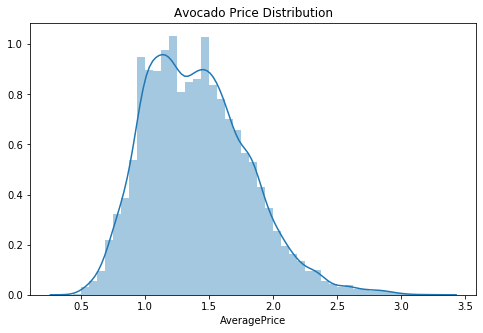

In [25]:
plt.figure(figsize=(8,5))
plt.title("Avocado Price Distribution")
sns.distplot(df['AveragePrice'], kde=True, bins=45)
plt.show()

Observa-se uma distribuição assimétrica com cauda direita alongada, mas que para algumas aplicações poderia ser aproximada por uma distribuição normal.

<br>

#### - Visualizando o preço médio de avocado orgânico por tipo e por região

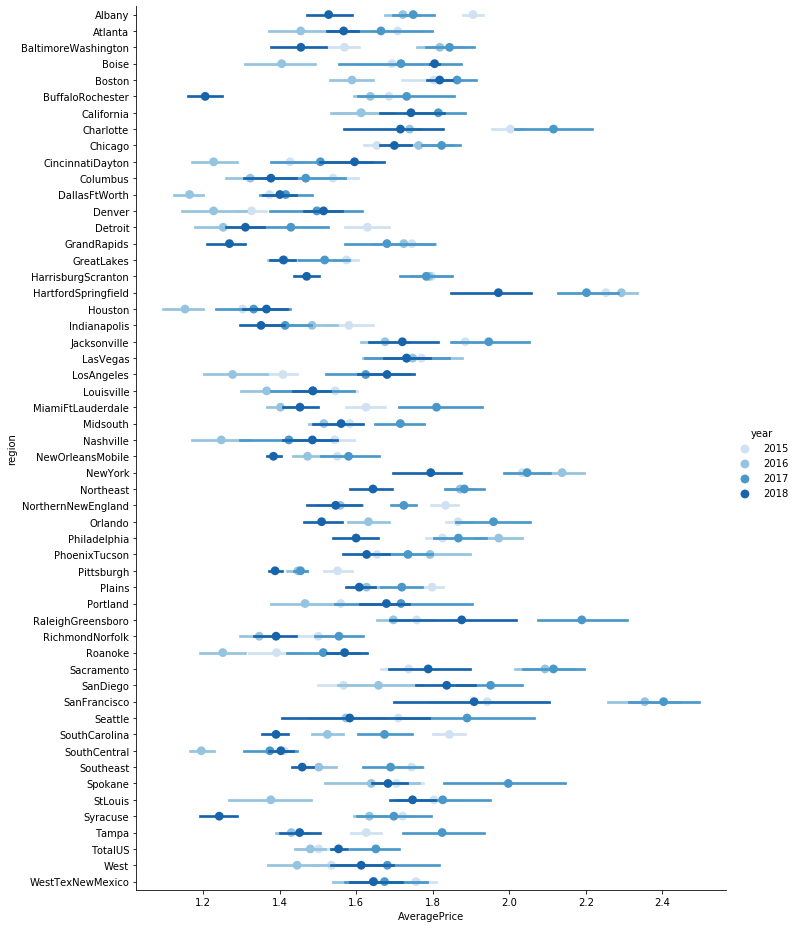

In [26]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='Blues',
                   join=False);

Em 2017 pode se identificar que houve um pico de preço médio nos abacates orgânicos em São Francisco, que se justificou após verificar-se o seguinte artigo, que explica uma baixa produção de avocados em 2017 ( o que explica diretamente o aumento do preço - lei básica da economia sobre oferta e demanda de bens e serviços): http://theproducenews.com/organic-avocado-supplies-are-rise.

De modo geral, coniderando a média de preços nos três anos que estamos analisando, em São Francisco e em Hartford-Springfield os avocados orgânicos tiveram preço bastante acima das demais regiões.

<br>

#### - Visualizando o preço médio de avocado convencional por tipo e por região

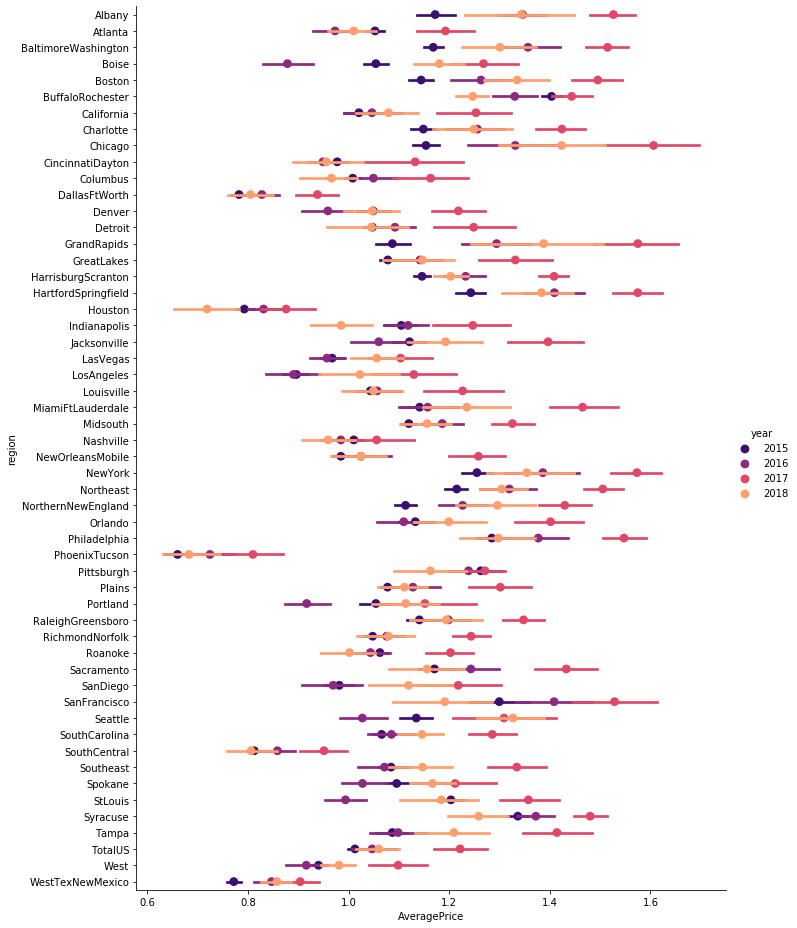

In [27]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

O abacate orgânico é mais caro, e o abacate em geral fica mais caro a cada ano entre 2015 e 2017, de 2017 a 2018 o preço cai (justificável, pois, conforme pesquisa, nesta época houve uma supersafra).

<br>

#### - Efetuando uma mudança de tipo de escala do atributo "type" de categórico/nominal para quantitativo binário (0 para avocado convencional ou 1 para avocado orgânico):

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type) 

<br>

#### - Heatmap indicando a correlação (método Spearman) para todos os atributos ordinais e quantitativos:

(7.5, -0.5)

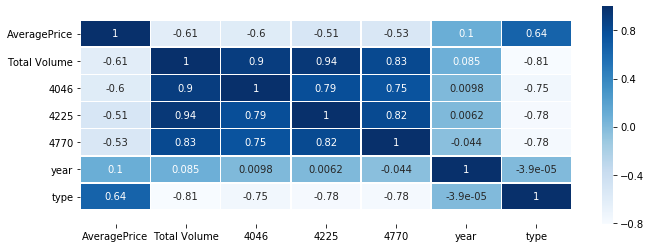

In [29]:
plt.figure(figsize = (11,4))
ax = sns.heatmap(df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year', 'type']].corr(method='spearman'), cmap='Blues',  linewidth=0.5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)

Pode-se verificar que o volume de tipos diferentes de abacate são fortemente correlacionados, com como todos são correlacionados com o volume total vendido.

<br>

#### - Tabela de contigência para avaliar a frequencia de de amostragem em cada ano em cada região:

In [31]:
TC2 = pd.crosstab(df['region'], df['year'], margins = False)
print(TC2)

year                 2015  2016  2017  2018
region                                     
Albany                104   104   106    24
Atlanta               104   104   106    24
BaltimoreWashington   104   104   106    24
Boise                 104   104   106    24
Boston                104   104   106    24
BuffaloRochester      104   104   106    24
California            104   104   106    24
Charlotte             104   104   106    24
Chicago               104   104   106    24
CincinnatiDayton      104   104   106    24
Columbus              104   104   106    24
DallasFtWorth         104   104   106    24
Denver                104   104   106    24
Detroit               104   104   106    24
GrandRapids           104   104   106    24
GreatLakes            104   104   106    24
HarrisburgScranton    104   104   106    24
HartfordSpringfield   104   104   106    24
Houston               104   104   106    24
Indianapolis          104   104   106    24
Jacksonville          104   104 

Obs: dada o número de possibilidades de valores dos atributos qualitativos, se torna inviável a utilização de plots do tipo mosaico (que são basicamente a forma gráfica das tabelas de contigência)

<br>

#### - A partir do atributo mês (numérico) cria-se um novo atributo para o semestre/estação climática do ano:

In [32]:
# 12-21 a 03-19: inverno, 03-20 a 06-20: primavera, 06-21 a 09-21: verão, 09-22 a 12-20: outono
# jan-mar: 1º tri (~ inverno), abr-jun: 2º tri (~ primavera), jul-set: 3º tri (~ verão), out-dez: 4º tri (~ outono)

df['Season'] = ['empty'] * 18249


for i,value in enumerate(df['Month'], 0):
    if value in range(1,4):
      df['Season'][i] = '1st trim (winter)'
    elif value in range(4,7):
      df['Season'][i] = '2nd trim (spring)'
    elif value in range(7,10):
      df['Season'][i] = '3rd trim (summer)'
    else:
      df['Season'][i] = '4th trim (autumn)'

<br>

#### - Visualização da nova coluna do Dataframe:

In [33]:
df['Season']

0        4th trim (autumn)
1        4th trim (autumn)
2        4th trim (autumn)
3        4th trim (autumn)
4        4th trim (autumn)
               ...        
18244    1st trim (winter)
18245    1st trim (winter)
18246    1st trim (winter)
18247    1st trim (winter)
18248    1st trim (winter)
Name: Season, Length: 18249, dtype: object

<br>

#### - Visualização do Dataframe atualizado:

In [34]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Month-str,Month-str-full,Season
6219,2017-08-13,1.00,1263766.23,677058.95,260341.69,2582.06,0,2017,DallasFtWorth,8,Aug,August,3rd trim (summer)
18069,2018-03-25,1.60,9097.89,82.57,1984.01,0.00,1,2018,Roanoke,3,Mar,March,1st trim (winter)
7959,2017-10-15,1.69,275807.02,125345.26,60281.11,1836.26,0,2017,SouthCarolina,10,Oct,October,4th trim (autumn)
9020,2018-03-11,0.89,6621293.03,3309218.10,926223.64,28752.60,0,2018,SouthCentral,3,Mar,March,1st trim (winter)
5017,2016-07-03,1.41,891917.15,202576.49,546096.50,54358.08,0,2016,SanFrancisco,7,Jul,July,3rd trim (summer)


<br>

#### - Gráfico do volume total vendido em cada trimestre/estação do ano (tendo por medida base a mediana):

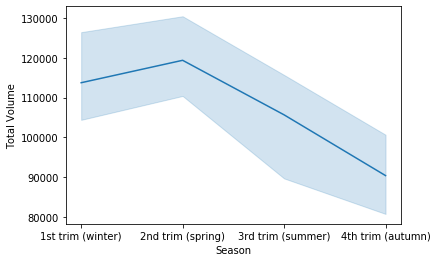

In [35]:
plt.figure(figsize = (6,4))
sns.lineplot(x='Season', y='Total Volume', data=df, estimator=median, palette="Blues_d")

<br>

#### - Gráfico de barras do volume total vendido de cada tipo de avocado em cada trimestre/estação do ano (tendo por estimador a meadiana):

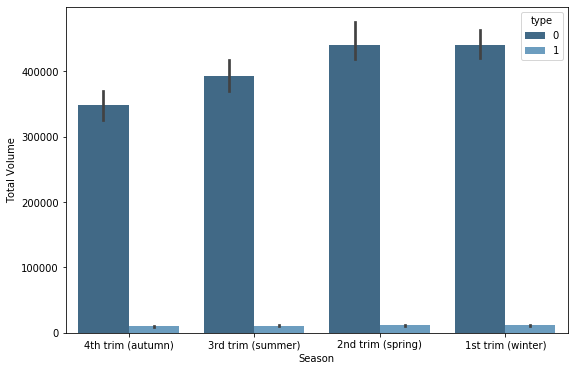

In [36]:
plt.figure(figsize = (9,6))
sns.barplot(x='Season', y='Total Volume', data=df, estimator=median, palette="Blues_d", hue='type')

<br>

#### - Gráfico de barras do preço médio de venda em cada trimestre/estação do ano (tendo por estimador a meadiana):

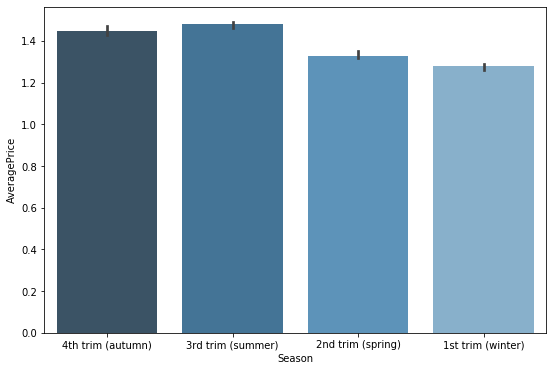

In [37]:
plt.figure(figsize = (9,6))
sns.barplot(x='Season', y='AveragePrice', estimator=median, data=df, palette="Blues_d")

<br>

#### - Gráfico de barras do preço médio de venda de cada tipo de avocado em cada trimestre/estação do ano (tendo por estimador a meadiana):

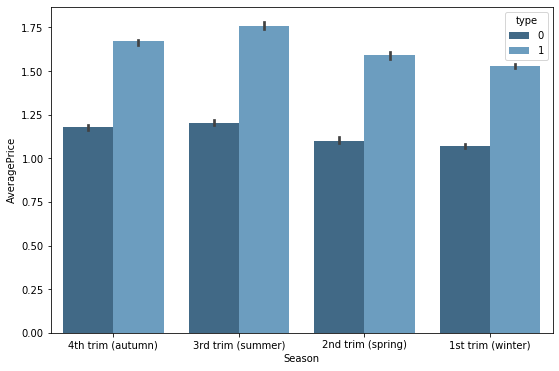

In [38]:
plt.figure(figsize = (9,6))
sns.barplot(x='Season', y='AveragePrice', estimator=median, data=df, palette="Blues_d", hue='type')

Mesmo que a análise foi feita tento por base os semestres, uma vez que eles se aproximam das definições das estações,verifica-se, tanto para o volume total vendido quanto para o preço média de venda, que as tendâncias comentadas anteriormente realmente se confirmam. Isto é, no outono verifica-se uma alta de preços e uma queda no volume vendido.

<br>

#### - A partir do atributo "Date" cria-se um novo atributo para o dia da semana:

In [39]:
df['Day'] = df['Date'].dt.day
df['Day-str'] = df['Date'].dt.strftime('%a')

In [40]:
df['Day-str']

0        Sun
1        Sun
2        Sun
3        Sun
4        Sun
        ... 
18244    Sun
18245    Sun
18246    Sun
18247    Sun
18248    Sun
Name: Day-str, Length: 18249, dtype: object

Verificou-se que as amostras foram reoclhidas sempre aos domingos.

<br>

#### - Plotagem multivariada da relação entre entre o preço médio e volume total vendido em cada trimestre:

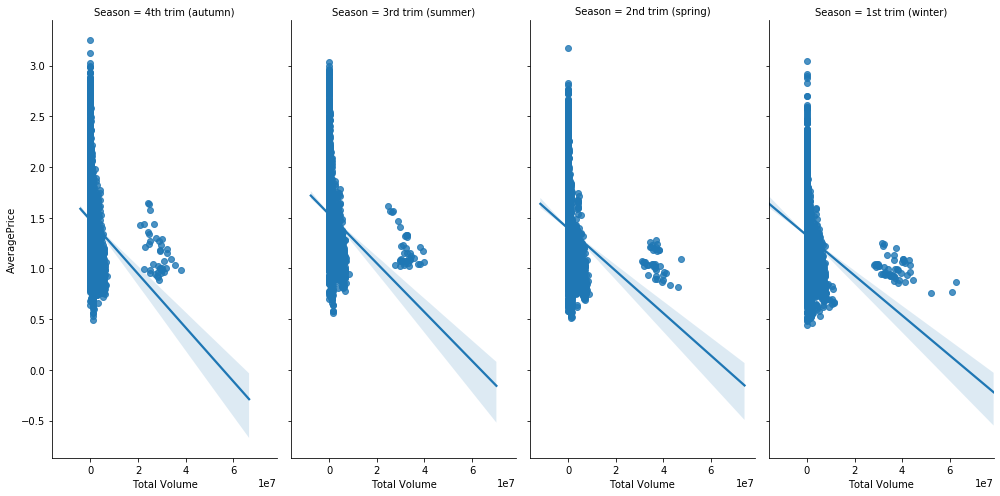

In [41]:
sns.lmplot(x='Total Volume', y='AveragePrice', data=df, col='Season', palette='Blues_d', aspect=0.5, size=7)

Conforme visto no heatmap, se trata de uma correlação média negativa/inversa (entre -0.6 e -0.7 - conforme o volume total aumenta, o preço tende a cair).

Em alguns casos, quando o preço acompanha a média de preços, o volume vendido aumenta, o que não infere que o volume vendido está relacionado com o preço

Possivelmente uma variância elevada bem como a presença de outliers acaba por distorcer a inclinação da reta, o que acontece em uma proporção significativamente menor quando se faz o mesmo gráfico considerando apenas o número de vendas do avocado 4046 ao invés de todos, como pode-se visualizar na próxima plotagem abaixo.

<br>

#### - Plotagem multivariada da relação entre o tamanho de avocado "4046" e "Total Volume" em cada trimestre/estação (se trata de uma correlação forte (acima de 0.9), conforme visto  o heatmap):

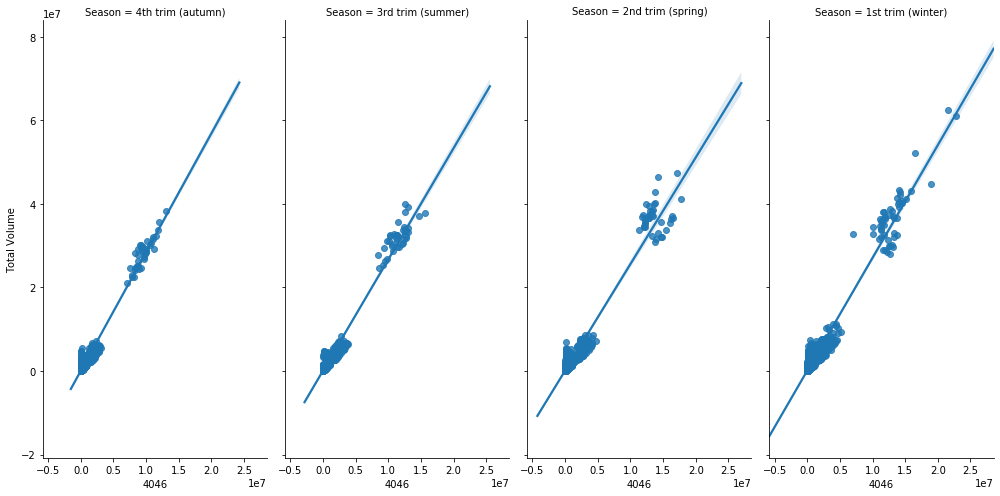

In [42]:
sns.lmplot(x='4046', y='Total Volume', data=df, col='Season', palette='Blues_d', aspect=0.5, size=7)

### 4 - DATA PREPARATION

Caso desenvolvêssemos uma abordagem de regressão ou classificação os atributos com forte correlação poderiam ser um problema dependendo do método que for utilizado, logo, teríamos que desconsiderar alguns. Isto é, realizar uma filtragem de atributos utilizando algum método adequado, por exemplo de filtragem, como o Correlated Features, por exemplo, onde normalmente costuma-se eliminar atributos preditivos que possuem uma correlação superior a 0.75, ou o ReliefF, que elimina atributos preditivos com pesos inferiores a 0.01 em relação ao atributo target.

<br>

#### - Quartis 1 (25%) e 3 (75%) e  distância interquartis :

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

Quartil 1:

In [44]:
print(Q1)

AveragePrice        1.10
Total Volume    10838.58
4046              854.07
4225             3008.78
4770                0.00
type                0.00
year             2015.00
Month               3.00
Day                 8.00
Name: 0.25, dtype: float64


Quartil 3:

In [45]:
print(Q3)

AveragePrice         1.66
Total Volume    432962.29
4046            111020.20
4225            150206.86
4770              6243.42
type                 1.00
year              2017.00
Month                9.00
Day                 23.00
Name: 0.75, dtype: float64


Diferença entre os quartis 3 e 1:

In [46]:
print(IQR)

AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
type                 1.00
year                 2.00
Month                6.00
Day                 15.00
dtype: float64


<br>

#### - Mínimos de cada atributo (podem ser usados para retirar possíveis outliers cujos valores estão abaixo dos respectivos mínimos de cada atributo):

In [47]:
Lower_Whisker = Q1 - 1.5 * IQR
print(Lower_Whisker)

AveragePrice         0.260
Total Volume   -622346.985
4046           -164395.125
4225           -217788.340
4770             -9365.130
type                -1.500
year              2012.000
Month               -6.000
Day                -14.500
dtype: float64


<br>

#### - Máximos de cada atributo (podem ser usados para retirar possíveis outliers cujos valores estão acima dos respectivos máximos de cada atributo):

In [48]:
Upper_Whisker = Q3 + 1.5 * IQR
print(Upper_Whisker)

AveragePrice          2.500
Total Volume    1066147.855
4046             276269.395
4225             371003.980
4770              15608.550
type                  2.500
year               2020.000
Month                18.000
Day                  45.500
dtype: float64


<br>

#### - Instâncias com possíveis outliers:

In [49]:
df[['AveragePrice', 'Total Volume', '4046', '4225', '4770']].loc[

(df['AveragePrice'] < 0.260) |
(df['Total Volume'] < -622346.985) |
(df['4046'] < -164395.125) |
(df['4225'] < -217788.340) |
(df['4770'] < -9365.130) |

(df['Total Volume'] > 1066147.855) |
(df['4046'] > 276269.395) |
(df['4225'] > 371003.980) |
(df['4770'] > 15608.550)]


,AveragePrice,Total Volume,4046,4225,4770
52,0.99,386100.49,292097.36,27350.92,297.90
54,0.96,417772.47,324932.28,31019.08,275.80
55,1.07,357636.82,283024.01,23740.85,181.92
60,0.99,419088.74,290457.50,62980.07,252.79
66,0.93,516432.60,346118.51,82762.72,1349.41
...,...,...,...,...,...
18220,1.53,1384683.41,117922.52,287724.61,1703.52
18221,1.61,1336979.09,118616.17,280080.34,1270.61
18222,1.63,1283987.65,108705.28,259172.13,1490.02
18223,1.59,1476651.08,145680.62,323669.83,1580.01


Verifica-se que 4494 das 18248 instâncias possuem possíveis outliers.

O dataset não apresenta valores faltantes, assim como não parece apresentar valores com ruído ou inconsistentes, apenas outliers. Outliers são valores incomum mas que podem ser legítimos/reais. Ainda assim, normalmente distorcem o treino do modelo e causam modelos com maiores erros associados (modelos não costumam prever casos extremos), e por isso usualmente outliers são tratados ou retirados.O quanto influenciam na qualidade do modelo depende de que almoritmo se utiliza, bem como se se trata de um método de classificação, regressão etc. 

Para o caso do presente trabalho, como vimos acima, 4494 das 18248 instâncias possuem outliers para pelo menos um dos atributos. Ao eliminar estas instâncias ainda teríamos uma boa quantidade de dados (13755 instânicas) e informações para realizar abordagens de clustering e/ou pedição. Desta forma, serão eliminadas as instâncias onde as colunas AveragePrice', 'Total Volume', '4046', '4225' e '4770' apresentam valores outliers.

In [50]:
df_clean = df[~((df['AveragePrice'] < 0.260) |
(df['Total Volume'] < -622346.985) |
(df['4046'] < -164395.125) |
(df['4225'] < -217788.340) |
(df['4770'] < -9365.130) |

(df['Total Volume'] > 1066147.855) |
(df['4046'] > 276269.395) |
(df['4225'] > 371003.980) |
(df['4770'] > 15608.550))]
df_clean.shape

(13755, 15)

<br>

#### - Eliminar as clunas 'Day-str','Day','Month-str-full', que não serão uteis para nada em tarefas de clustering ou predição.

In [51]:
df_clean.drop(['Day-str','Day','Month-str-full'], axis=1, inplace=True)

In [52]:
df_clean.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Month-str,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,Albany,12,Dec,4th trim (autumn)
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,0,2015,Albany,12,Dec,4th trim (autumn)
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,0,2015,Albany,12,Dec,4th trim (autumn)
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,0,2015,Albany,12,Dec,4th trim (autumn)
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,0,2015,Albany,11,Nov,4th trim (autumn)


#### - Agora devemos normalizar os dados de forma a não afetar o algoritmo de clustering que será aplicado, uma vez que este utiliza métricas de distância e diferenças de ordens de grandeza afetam fortemente seu desempenho.

A normalização dos índices pode melhorar o processo de previsão. A normalização permite suavizar o efeito dos valores mais altos no cálculo dos valores médios dos índices.

In [53]:
from sklearn import preprocessing

x = df_clean[['AveragePrice',	'Total Volume',	'4046',	'4225',	'4770']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_clean_numCols = [['AveragePrice',	'Total Volume',	'4046',	'4225',	'4770']]
df_clean_norm = pd.DataFrame(x_scaled, index=df_clean.index, columns=df_clean_numCols)
df_clean_norm[['type','year','Month','region','Month-str','Season']] = df_clean[['type','year','Month','region','Month-str','Season']]

In [54]:
type_str = df_copy[~((df_copy['AveragePrice'] < 0.260) |
(df_copy['Total Volume'] < -622346.985) |
(df_copy['4046'] < -164395.125) |
(df_copy['4225'] < -217788.340) |
(df_copy['4770'] < -9365.130) |

(df_copy['Total Volume'] > 1066147.855) |
(df_copy['4046'] > 276269.395) |
(df_copy['4225'] > 371003.980) |
(df_copy['4770'] > 15608.550))]['type']

df_clean_norm.drop(['type'], axis=1, inplace=True)
df_clean_norm['Type-str'] = type_str


<br>

#### - Dataframe com atributos numéricos normalizados:

In [55]:
df_clean_norm.head()

,AveragePrice,Total Volume,4046,4225,4770,year,Month,region,Month-str,Season,Type-str
0,0.316726,0.060481,0.003753,0.147251,0.003087,2015,12,Albany,Dec,4th trim (autumn),0
1,0.323843,0.051657,0.002441,0.120707,0.003738,2015,12,Albany,Dec,4th trim (autumn),0
2,0.174377,0.111376,0.002877,0.295150,0.008364,2015,12,Albany,Dec,4th trim (autumn),0
3,0.227758,0.074393,0.004098,0.194630,0.004652,2015,12,Albany,Dec,4th trim (autumn),0
4,0.298932,0.048039,0.003408,0.118543,0.004857,2015,11,Albany,Nov,4th trim (autumn),0


Obs.: Type-str = 0 significa avocado convencional, já Type-str = 1 se refere ao avocado orgânico

### 5 - MODELLING

#### Será desenvolvido um modelo a partir do algoritmo de clustering K-Means.

In [56]:
from sklearn.cluster import KMeans

#### Ao instanciar a classe KMeans devo passar como hiper-parâmetro um número de clusters K (primpario, que depois pode ser otimizado):

In [57]:
kmeans = KMeans(n_clusters=4, init="random", n_init=10, max_iter=400, random_state=42).fit(df_clean_norm.drop(['Type-str', 'region', 'Month-str', 'Season'], inplace=False, axis=1))

In [58]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=400, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

<br>

#### - Visualização do modelo de clustering para os atributos de volume total e preço médio:

In [59]:
X = df_clean_norm.iloc[:, [0, 1]].values
y_kmeans = kmeans.fit_predict(X)

In [60]:
df_clean_norm.iloc[:, [0, 1]].head()

,AveragePrice,Total Volume
0,0.316726,0.060481
1,0.323843,0.051657
2,0.174377,0.111376
3,0.227758,0.074393
4,0.298932,0.048039


In [61]:
y_kmeans

array([1, 1, 0, ..., 3, 3, 1])

<br>

#### - Verificando possíveis valores que y_kmeans pode assumir:

In [62]:
output = set()
for x in y_kmeans:
    output.add(x)
print(output)

{0, 1, 2, 3}


<br>

#### - Verificando o formato de X:

In [63]:
X

array([[0.31672598, 0.06048136],
       [0.32384342, 0.05165727],
       [0.17437722, 0.11137609],
       ...,
       [0.5088968 , 0.01289932],
       [0.53024911, 0.01519826],
       [0.41992883, 0.01640913]])

<br>

#### - Plotagem dos clusters para o volume total vendido e o preço médio de venda de avocados:

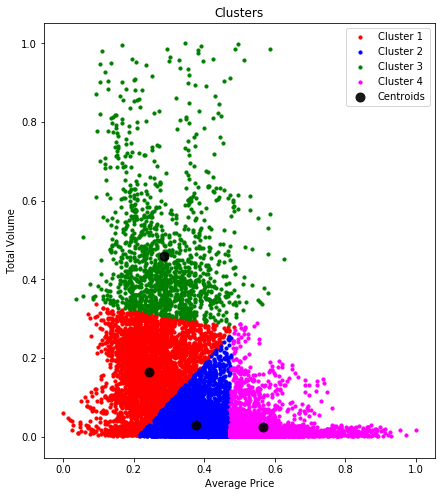

In [64]:
plt.figure(figsize=(7,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, alpha=0.9, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.legend()
plt.show()

Verifica-se para 4 clusters que temos clusters muito próximos e com grande diferença nos formatos e nas propriedades internas e externas, como de compactação, por exemplo. Isso pode ocorrer porque temos muitos pontos, possivelmente ocorrendo sobreposisição e uma discretização no espaço com pequenos intervalos/distâncias e, ainda, porque as variáveis preço médio e volume total não possuem grupos de pares de intervalos de valores bem definidos, dificultando a criação de clusters claros, distantes e bem delimitados.

<br>

#### - Verificação dos centroides dos clusters:

In [65]:
kmeans.cluster_centers_

array([[0.24365114, 0.1632732 ],
       [0.37543408, 0.03006397],
       [0.2865229 , 0.45927894],
       [0.56713307, 0.02313162]])

<br>

#### - Verificação dos possíveis rótulos dos clusters:

In [66]:
kmeans.labels_

array([1, 1, 0, ..., 3, 3, 1])

<br>

#### - Plotagem dos clusters para o volume de vendas do avocado tipo 4046 vs. preço médio:

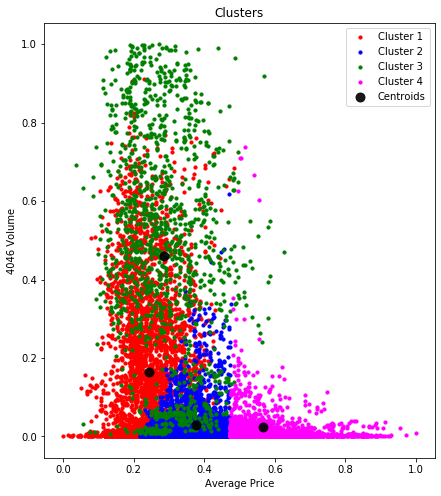

In [67]:
X2 = df_clean_norm.iloc[:, [0, 2]].values
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(7,8))
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 10, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, alpha=0.9, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Average Price')
plt.ylabel('4046 Volume')
plt.legend()
plt.show()

Verifica-se sobreposição dos pontos de diferentes clusters, o que indica que não há uma boa separação de clusters e, provavelmente alguns pontos foram associados ao cluster errado.

### 6 - EVALUATION

#### Para realizar medidas de erro é necessário que voltamos ao Dataframe não normalizado:

In [68]:
x_DEscaled = min_max_scaler.inverse_transform(x_scaled)
df_clean_numCols = [['AveragePrice',	'Total Volume',	'4046',	'4225',	'4770']]
df_clean_DEnorm = pd.DataFrame(x_DEscaled, index=df_clean.index, columns=df_clean_numCols)
df_clean_DEnorm[['type','year','Month','region','Month-str','Season']] = df_clean[['type','year','Month','region','Month-str','Season']]
df_clean_DEnorm.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,Month,region,Month-str,Season
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015,12,Albany,Dec,4th trim (autumn)
1,1.35,54876.98,674.28,44638.81,58.33,0,2015,12,Albany,Dec,4th trim (autumn)
2,0.93,118220.22,794.70,109149.67,130.50,0,2015,12,Albany,Dec,4th trim (autumn)
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015,12,Albany,Dec,4th trim (autumn)
4,1.28,51039.60,941.48,43838.39,75.78,0,2015,11,Albany,Nov,4th trim (autumn)


Agora podemos otimizar o valor do hiperparâmetro K (número de clusters) utilizando o método do cotovelo (gráfico inércia vs. K) para K entre 1 e 40. Onde a inérica, ou inércia total, para um determinado K é dada pela soma das inércias de cada um dos K clusters. Já a inércia de um cluster, ou distância intracluster, é a soma das distâncias de todos os pontos deste cluster até o seu centroide. Assim, pode-se dizer que a inércia total é uma medida de quão compactos os clusters são, e quanto mais compactos  (quanto menor a inércia total), melhor.

A inércia é um exemplo de medida de qualidade do cluster do tipo índice interno. O objetivo desses índices é identificar conjuntos de clusters que são compactos, com uma pequena variação entre os membros do cluster, e bem separados, onde as médias dos diferentes clusters estão suficientemente distantes, em comparação com a variância dentro do cluster.. Também existem medidas do tipo índice externo, que medem se o que foi agrupado realmente devia ter sido agrupado ou não. Um exemplo deste tipo de índice (externo) é o índice de Jaccard, que é o quociente entre a área de intersecção de dois clusters e a área de união deles, e é muito utilizado para comparar valores preditos com valores reais, inclusive em aplicações envolvendo imagens, por exemplo. Quanto mais próximo de 1 é o índice de Jaccard, maior a qualidade dos clusters. Este método não será abordado neste trabalho mas fica como recomendação ou sugestão de continuidade.

In [69]:
error_rate = []
for i in range(1,41):
    
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    Kmeans.fit(X)
    error_rate.append(Kmeans.inertia_)

Text(0, 0.5, 'Inertia')

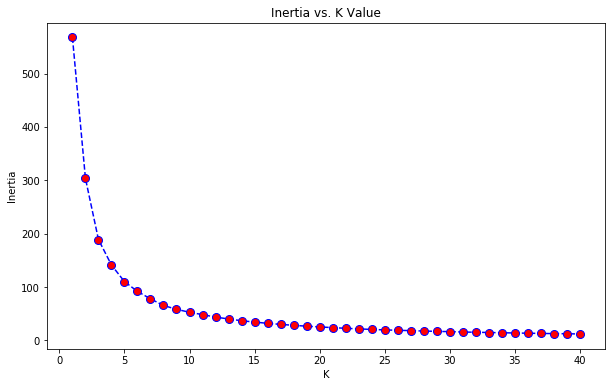

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41,1),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Inertia vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia')

  Como a curva é bastante suave (não há um ponto onde a inclinação muda de forma mais abrupta), torna-se complicado dizer exatamento um valor de K que seria o ideal, isto é, que aumentando-se K além dele não se verifica uma consideral queda na taxa de erro Entretanto, podemos assumir que para K=8 já teríamos uma boa taxa de erro, e a partir daí não se ganharia muito ao aumentar K.

In [71]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=400, random_state=42).fit(df_clean_norm.drop(['Type-str', 'region', 'Month-str', 'Season'], inplace=False, axis=1))

Diferente do que foi feito anteriormente, quando se usou o parâmetro init='random' (inicialização dos clusters de forma aleatória), agora utilizou-se init='k-means++'. 

K-Means ++ especifica um procedimento para inicializar os centros do cluster antes de avançar com o algoritmo de cluster k-means padrão.

Usando o algoritmo K-Means ++, otimizamos a etapa em que escolhemos aleatoriamente o centróide do cluster. É mais provável que encontremos uma solução que seja competitiva para a solução K-Means ideal ao usar a inicialização K-Means ++.

In [72]:
X = df_clean_norm.iloc[:, [0, 1]].values
y_kmeans = kmeans.fit_predict(X)

Optou-se para criar e avaliar os clusters quado se pretende visualizar as variáveis Total Volume e Average Price. As demais não serão consideradas aqui, para tanto seria necessário uma análise de feature selection mais detalhada.

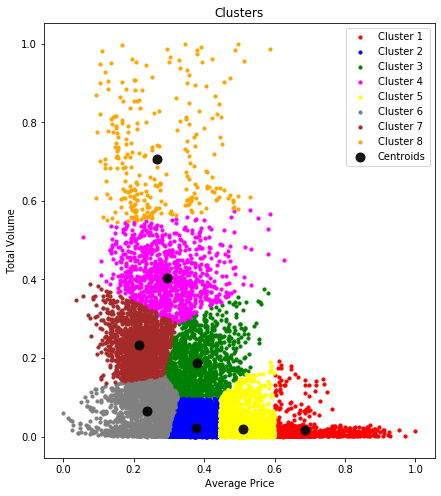

In [73]:
plt.figure(figsize=(7,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'yellow', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 10, c = 'grey', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 10, c = 'brown', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 10, c = 'orange', label = 'Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, alpha=0.9, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.legend()
plt.show()

Verifica-se que para 8 clusters a separação dos dados é feita de forma bem mais homogênea do que ocorreu para 4 clusters, observa-se clusters com menor diferença nos formatos e nas propriedades internas e externas. Ainda assim, o alto número de pontos e o fato das variáveis preço médio e volume total não possuem grupos de pares de intervalos de valores bem definidos, continua dificultando a criação de clusters claros, distantes e bem delimitados.

Outra medida de qualidade dos clusters do tipo índice interno, assim como a inércia (já comentada), é a distância entre centroides. Se a qualidade dos clusters é maior quando suas inércias são menores, a qualidade também é maior quando as distâncias entre cada cluster (distâncias interclusters - simbolizadas pelas distâncias entre cada centroide) também são maiores. 

Por exemplo, na imagem acima verifica-se que a inércia do cluster mais de cima, cor amarelo, é provavelmente grande (pouco compacto), dado que os pontos possuem grande distância intracluster até o centroide. No entando o centroide deste cluster está longe dos demais, possuindo grande distância intercluster. Por outro lado, o cluster do centro inferior, de cor verde, por exemplo, possui pequena inércia (é um cluster compacto, com pequenas distâncias intracluster), mas seu centroide está próximo de outros (pequenas distâncias interclusters).

Esta distância - intercluster - pode ser:
- Distância de ligação única: menor distância possível entre dois objetos pertencentes a cada um dos clusters.
- Distância de ligação completa: maior distância possível entre dois objetos pertencentes a cada um dos clusters.
- Distância média de ligação: distância média entre todos os objetos pertencentes a ambos clusters.
- Distância de ligação do centroide: distância entre o centroide dos clusters.
- Distância de ligação Ward: avalia os clusters mais compactos (estado da arte de avaliação de distâncias interclisters).

A distância intercluster pode ser avaliada pelo índice Dunn, dado pelo quociente do menor valor de distância intercluster pelo maior valor de distância intracluster, de forma a considerar o pior cenário possível. Assim, quanto maior o índice Dunn, maior a qualidade dos clusters. Outra maneira de calcular esta medida é utilizando o método Silhouette ao invés do índice de Dunn, o que será abordado a seguir.

O índice Silhouette é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação), e pode ser usado para estudar a distância de separação entre os clusters resultantes. A rotina consiste em calcular o índice de Silhouette para cada amostra, o índice médio de Silhouette para cada cluster e o índice médio geral de Silhouette para um conjunto de dados. Usando esta abordagem, cada cluster pode ser representado pelo seu índice Silhouette, que é baseado na comparação de sua compactação e separação. Se o valor do índice do Silhouette for alto, o objeto está bem assoiado a seu próprio cluster e mal associado aos clusters vizinhos. O coeficiente Silhouette é calculado usando a distância média intracluster e a distância média mais próxima do cluster para cada amostra.

O índice médio geral de Silhouette está entre -1 e 1. Se o valor do Silhouette for próximo de 1, a amostra está bem agrupada e já atribuída a um cluster muito apropriado. Se o valor do Silhouette for cerca de 0, a amostra poderia ser atribuída a outro cluster mais próximo a ela e ainda assim ficaria quase que igualmente distante de ambos clusters (normalmente isso indica que os clusters estão sobrepostos). Se o valor do Silhouette estiver próximo de -1, a amostra foi associada ao cluster errado.

<br>

#### - Aplicação do índice Silhouette:

In [74]:
from sklearn.metrics import silhouette_score
print('O índice médio de Silhouette para 8 clusters é', silhouette_score(X,y_kmeans))

O índice médio de Silhouette para 8 clusters é 0.41198860251573405


Um índice médio de Silhouette de 0.4114 permite inferir que os pontos de um cluster estão relativamente longe dos clusters vizinhos, o que indica uma boa separação entre clusters. Porém, também pode-se dizer que apesar disto não estar acontecendo, os clusters não estão muito longe de terem alguns pontos se sobrepondo (como aconteceu na plotagens dos clusters para o volume de vendas do avocado tipo 4046 vs. preço médio mostrada anteriormente).

### 7 - CONCLUSÃO



Dado o critério de sucesso estabelecido na seção 1, conclui-se que o resultado foi parcialmente satisfatório. Isso porque a análise descritiva permitiu boa interpretabilidade e trouxe informações relevantes para o entendimento do comércio e consumo de avocado nos EUA, porém, a clusterização não se demonstrou de alta qualidade, com clusters próximos e compactação heterogênea. Ainda, os clusters obtidos não permitiram grande interpretabilidade, já que as variáveis utilizadas no modelo (volume total e preço médio) por si só não facilitam a distinção de diferentes grupos.


Pode-se deixar como sugestão para trabalhos futuros com o mesmo objetivo que o presente, ou seja, ainda sem falar em predição os seguintes pontos:

- Implementação de um modelo utilizando o algoritmo Principal Component Analysis (PCA) antes da clusterização e, porteiormente, volte-se a implementar um método do algorítmo K-Means.
- Desenvolvimento de um método utilizando o algoritmo DBSCAN que, apesar te ser conhecido por seus bons resultados com dados de GPS e sinais semelhantes, permite que sejam formados clusters com qualquer formato (diferente do K-Means, que é capaz de gerar apenas clusters convexos) e é capaz de detectar outliers de uma maneira às vezes - dependendo dos dados e dos objetivos - mais eficiente do que utilizar a abordagem do presente trabalho, onde utilizou-se diretamente da medida interquatil para deletar as instâncias com outliers em alguns dos atributos.